# 2018-04-01-minfile-analysis-datestamps

## April 1, 2018

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = 1000

In [2]:
%matplotlib inline
import mpl_toolkits.basemap
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

# 1 BC Minfile Analysis

## 1.0.1 Load and clean the data

<https://catalogue.data.gov.bc.ca/dataset/assessment-report-index-system-aris-database/resource/3f46ab30-77e3-4a92-a010-f73bf4f913a3>

In [4]:
df = pd.read_csv('../data/ariasdata.csv', encoding='latin')

In [5]:
pd.read_csv('../data/arismetadata.csv')[['Name','Description']]

,Name,Description
0,rep_no,Assessment Report Number
1,cnf_prd,Confidential Period
2,aff_dt,Affidavit Date
3,gwrk_typs,General Work Codes
4,claim_val,Claim Value
5,title,Title of Report
6,rep_yr,Report Year
7,wrk_yr,Work Year
8,conf_ldate,no data
9,conf_adate,Date Off Confidental


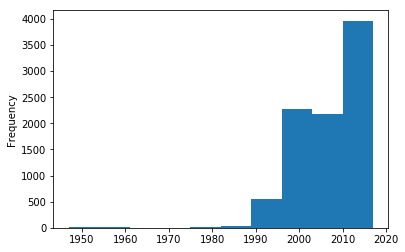

In [6]:
df[~df.com_nms.isnull()].wrk_yr.plot.hist()

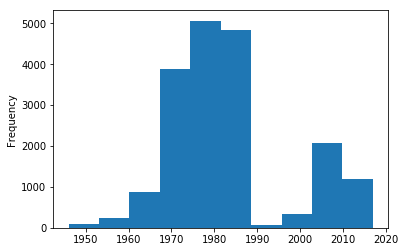

In [9]:
df[df.com_nms.isnull()].wrk_yr.plot.hist()

In [10]:
df.head(1).T

,0
rep_no,1
cnf_prd,1
aff_dt,01-01-1947
gwrk_typs,GEOL:
claim_val,0
title,Geological Report on the Moyie Groups 1-6 and the ML 55 Claim
rep_yr,1947
wrk_yr,1947
conf_ldate,NaN
conf_adate,1948-01-01


In [11]:
df.isnull().sum() / len(df) * 100

rep_no             0.000000
cnf_prd            0.454064
aff_dt             0.000000
gwrk_typs          0.000000
claim_val          0.000000
title             10.560477
rep_yr             0.000000
wrk_yr            22.856427
conf_ldate       100.000000
conf_adate         0.454064
aff_ndate        100.000000
aff_adate          0.000000
page_ct            0.000000
prpty_nm          10.566048
nts_maps           0.000000
bcgs_maps          0.000000
lat83_deg          0.000000
lat83_min          0.000000
lat83_sec          0.000000
lon83_deg          0.000000
lon83_min          0.000000
lon83_sec          0.000000
zone83             0.000000
north83            0.000000
east83             0.000000
lat83              0.000000
long83             0.000000
com_cds           58.226085
camp_cd           74.338403
geo_sum           75.539027
reg_geo           35.598083
info_cls          12.591231
mdiv_cds           0.005571
mdiv_nmx           0.005571
mdiv_nms           0.005571
claim_nmx          0

In [12]:
col_subset = ['rep_no', 'rep_yr', 'lat83', 'long83']
col_com = 'com_nms'

In [13]:
mask = (~df[col_com].isnull())
df_min = pd.DataFrame(
[cols+[comm] for cols, comms in
zip(df[mask][col_subset].values.tolist(), df[mask][col_com].str.split(', ').values.tolist())
for comm in comms],
columns=col_subset+[col_com])

In [14]:
df_min = df_min.rename(columns={'com_nms': 'commodity'})

In [15]:
df_min.rep_yr = df_min.rep_yr.astype(int)

In [14]:
(df_min.rep_yr < 1900).sum()

1

In [15]:
df_min = df_min[df_min.rep_yr > 1900]

In [16]:
df_min.head()

,rep_no,rep_yr,lat83,long83,commodity
0,1.0,1947,49.293333,-115.811111,Silver
1,1.0,1947,49.293333,-115.811111,Gold
2,49.0,1950,50.486667,-119.119444,Mica
3,60.0,1951,50.661667,-120.496389,Copper
4,69.0,1951,51.331667,-119.926111,Zinc


In [17]:
# rep no is a unique ID
len(df) - df.com_nms.isnull().sum(), len(df_min.rep_no.unique())

(14994, 14993)

# 1.0.2 Analysis

## Minerals in the dataset

In [18]:
df_min.commodity.value_counts(ascending=False).head(50)

Gold                      11134
Copper                     7672
Silver                     6656
Zinc                       4284
Lead                       3717
Molybdenum/Molybdenite     1453
Platinum                    312
Nickel                      309
Tungsten                    225
Palladium                   220
Iron                        197
Limestone                   183
Cobalt                      173
Barium/Barite               147
Arsenic                     144
Antimony                    133
Rare Earths                 107
Cadmium                      84
Chromium/Chromite            70
Niobium/Columbium            69
Diamond                      67
Dimension Stone              63
Jade/Nephrite                60
Magnesite                    60
Uranium                      60
Silica                       54
Phosphate                    54
Bismuth                      53
Mercury                      53
Graphite                     51
Rhenium                      42
Gemstone

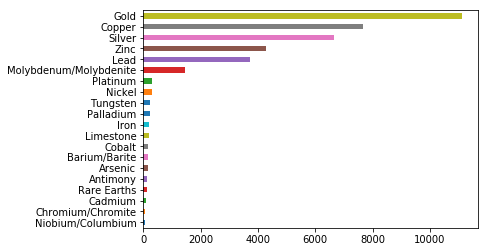

In [19]:
df_min.commodity.value_counts(ascending=False).head(20)[::-1].plot.barh()

**Average number of minerals per site**

In [20]:
df_min.columns

Index(['rep_no', 'rep_yr', 'lat83', 'long83', 'commodity'], dtype='object')

In [21]:
df_min.groupby('rep_no').commodity.size().mean()

2.590809044220636

**Depth distribution**

In [22]:
df_min.elevation.hist(bins=50, label='All minerals')
plt.legend()

AttributeError: 'DataFrame' object has no attribute 'elevation'

In [ ]:
df_min[df_min.commodity=='Gold'].elevation.hist(bins=50, label='Gold')
plt.legend()

## 1.0.3 Map plots

In [ ]:
def plot_map(df_min, commodity='', quality='l'):
    if commodity:
        longs = list(df_min[df_min.commodity == commodity].long83)
        latts = list(df_min[df_min.commodity == commodity].lat83)
    else:
        longs = list(df_min.long83)
        latts = list(df_min.lat83)
        
# plot the blank world map
my_map = Basemap(projection='merc', lat_0=50, lon_0=-100,
    resolution = quality, area_thresh = 5000.0,
    llcrnrlon=min(longs), llcrnrlat=min(latts),
    urcrnrlon=max(longs), urcrnrlat=max(latts))

# set resolution='h' for high quality
# draw elements onto the world map
my_map.drawcountries()
#my_map.drawstates()
my_map.drawcoastlines(antialiased=False,
    linewidth=0.005)
# add coordinates as red dots
x, y = my_map(longs, latts)
my_map.plot(x, y, 'ro', markersize=0.5, alpha=0.5)
plt.show()

In [ ]:
plot_map(df_min.groupby('rep_no').head(1))

In [ ]:
plot_map(df_min, 'Gold')

In [67]:
plot_map(df_min, 'Copper')

In [69]:
plot_map(df_min, 'Cobalt')

**1.0.4 Depoits by discovery date**

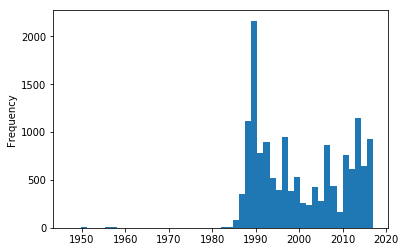

In [70]:
df_min.groupby('rep_no').head(1).rep_yr.plot.hist(50)

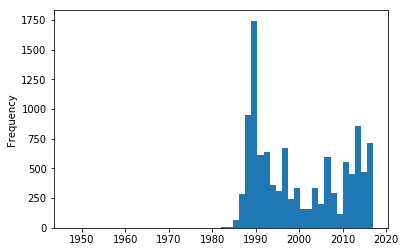

In [71]:
df_min[df_min.commodity == 'Gold'].rep_yr.plot.hist(50)

In [73]:
gold = df_min[df_min.commodity == 'Gold']
len(gold)

11134

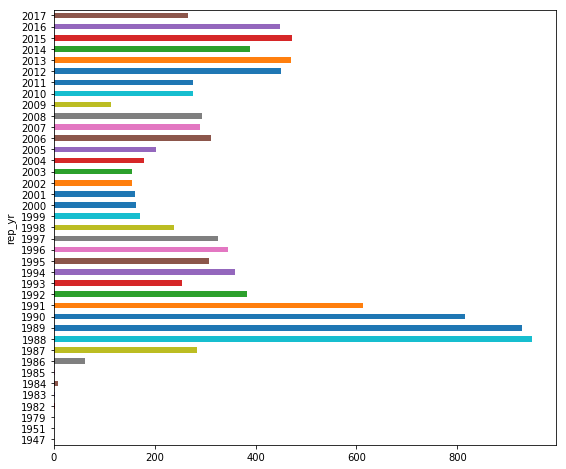

In [75]:
fig = plt.figure(figsize=(9, 8))
gold.groupby('rep_yr').size().plot.barh()

In [23]:
gold = df_min[df_min.commodity == 'Cobalt']
len(gold)

173